# Data Visualization Tutorial
_________________________________________________________________________________

## Introduction

In this tutorial, we'll introduce the **data visualization functions** available in BastionLab and see **how to use them**.

### Technical Requirements

We assume you have:
- Python3.7 or greater *(get the latest version of Python at [https://www.python.org/downloads/](https://www.python.org/downloads/) or with your operating system’s package manager)*
- [Python Pip](https://pypi.org/project/pip/) (PyPi), the package manager

## Getting Set Up

You'll need to download the **Titanic dataset** as in the quick-tour. The Titanic dataset is one of the most popular datasets used for understanding machine learning and contains information relating to the passengers aboard the Titanic.

You can get the titanic.csv file from: https://www.kaggle.com/code/startupsci/titanic-data-science-solutions/data by creating a free account, or you can run the following lines of code:

In [ ]:
!wget 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'

Next, we'll launch the server using Docker. We specify the environment variable DISABLE_AUTHENTICATION=1 to disable authentication. This is simpy so we can focus on the visualization functions in this tutorial, but is not recommended in production.

In [2]:
!docker run -it -p 50056:50056 --env DISABLE_AUTHENTICATION=1 -d mithrilsecuritysas/bastionlab:latest

Then, we'll install the necessary dependecies for this notebook - BastionLab and polars:

In [3]:
! pip install polars
! pip install bastionlab

## Connecting to the Remote Dataset

>*In a typical workflow, the data owner would send a set of keys to the server, so that authorization can be required for all users at the point of connection. **BastionLab offers the authorization feature**, but as it's not the focus of this visualization tutorial, we will not use it. You can refer to the [authorization tutorial]() if you want to set it up.*

We'll connect to remote dataset by create an instance of `Connection()` and supplying the constructor with the host and port of our docker instance.

In [4]:
from bastionlab import Connection

connection = Connection("localhost", 50056)
client = connection.client

Next, we het a Polars DataFrame instance of our csv file using Polars' read_csv function.

We then create a custom policy which disables all data request/query checks. We do this creating a policy where the `safe_zone` parameter to `TrueRule()` to allow all requests. In this case, the `unsafe_handling` parameter can be anything (as there are no unsafe requests), we set it to `Log()` in the following example. Note that this is purely done so that we can focus on demonstrating our visualization functions in this tutorial, but this policy is not suited for production.

Finally, we send the Polars' DataFrame instance to the server using Bastionlab's `polars.send_df()` method which will return a RemoteLazyFrame instance, a reference to the DataFrame uploaded which we will be working with throughout this tutorial.

In [5]:
import polars as pl
from bastionlab.polars.policy import Policy, TrueRule, Log

df = pl.read_csv("titanic.csv")
policy = Policy(safe_zone=TrueRule(), unsafe_handling=Log())
rdf = client.polars.send_df(df, policy=policy)

rdf

FetchableLazyFrame(identifier=f30d17b7-c7b8-4ac4-886c-15cc3be1f652)

Since we are using the classic Titanic dataset, let's list the columns to verify we got the right dataset and give you an idea of the data we will be handling in this tutorial.

In [6]:
rdf.columns

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

## Histplot
_____________________________________________________________________

Now, let's take a look at the first of our data visualization options, **histplot**.

The histplot function accepts `x` and `y` arguments, which are strings referring to a column name, plus a `bins` integer value, which is set to 10 by default. You must provide either an `x` or `y` argument, the rest is optional. We also accept any `kwargs` arguments accepted by Seaborn's barplot function (This is possible because we call this function internally once we have ran the relevant aggregated query and applied bins to our dataframe.) Accepted options are listed in [the Seaborn documentation](https://seaborn.pydata.org/generated/seaborn.barplot.html).

Let's take a look at a simple example. Here, we create a histogram to show the number of passengers in each age category, with bins of 15.

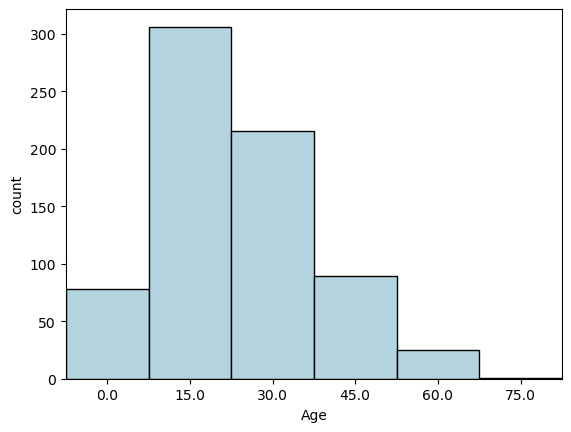

In [7]:
rdf.histplot(x="Age", bins=15)

If we provide an `x` and `y` value, this will internally make use of Seaborn's `heatmap` function and accepts the options listen in [Seaborn's heatmap documentation](https://seaborn.pydata.org/generated/seaborn.heatmap.html).

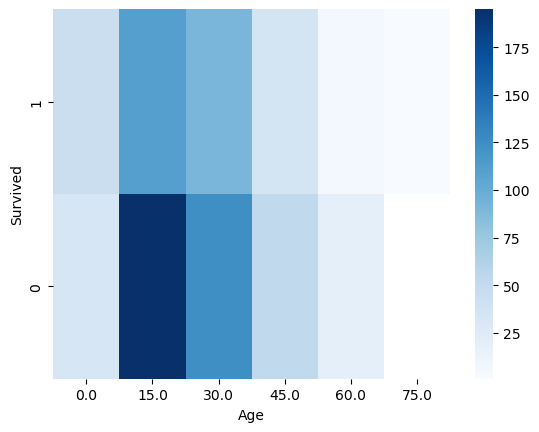

In [8]:
rdf.histplot(x="Age", y="Survived", bins=15)

## Barplot
_____________________________________________________________________

Now, let's take a look at the first of our data visualization options, **barplot**.

barplot filters data down to necessary columns only, runs an aggregated query to get the mean (or other estimator function) `y` value for the `x` axes, and then calls Seaborn's barplot function to draw the barchart, forwarding on just this aggregated and filtered down dataset.

The barplot function requires `x` and `y` values, which are strings referring to a column name. Barplot also accepts an optional `estimator` string argument, where you can change the default estimator (mean) to any of the following estimators: "mean", "median", "count", "max", "min", "std" and "sum". There is also an optional `hue` argument where you can specify the name of a column you want to be used to group results by. We also accept any `kwargs` arguments accepted by Seaborn's barplot function. Accepted options are listed in [the Seaborn documentation](https://seaborn.pydata.org/generated/seaborn.barplot.html).

Let's take a look at a simple example. Here, we create a histogram to show the number of passengers in each age category, with bins of 15.

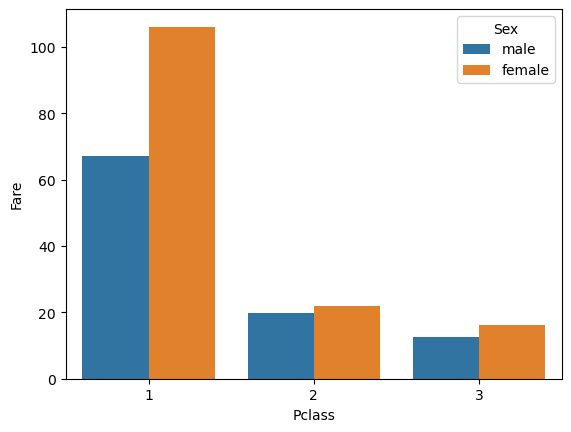

In [9]:
rdf.barplot(x="Pclass", y="Fare", hue="Sex")

## Scatterplot
________________________________________________________________________________

The `scatterplot` function plot will display a scatter diagram based on x and y arguments which can be used to look for correlations between x and y columns. Scatterplot requires `x` and `y` string arguments referring to the name of the columns to be used for the x and y axes in the scatterplot.

Scatterplot will first narrow down the RemoteLazyFrame to the necessary columns to make the function call, before calling Seaborn's `scatterplot` function to plot your scattergraph.

This function also accepts the same `optional arguments` as Seaborn's scatterplot function as `kwargs` which you can find [here](https://seaborn.pydata.org/generated/seaborn.scatterplot.html).

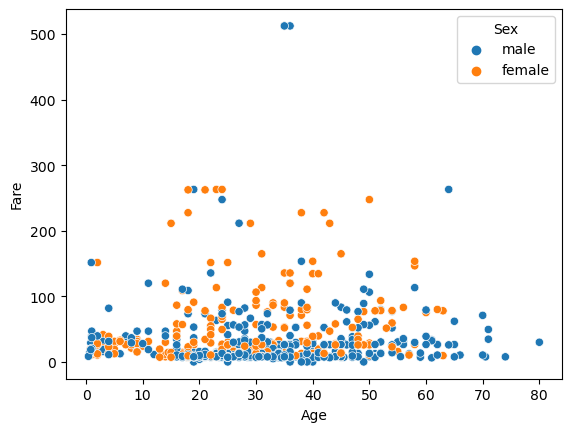

In [10]:
rdf.scatterplot("Age", "Fare", hue="Sex")

## Lineplot
________________________________________________________________________________

The `lineplot` function filters our dataframe down to necessary columns only and then draws a lineplot using Seaborn's `lineplot` function.

Lineplot requires `x` and `y` string arguments that refer to the names of columns to be used for the x and y axes. 

Lineplot also accepts `hue`, `size` and `string` arguments which are the name of the columns to be used as grouping variables which will produce lines with different
colors, widths and dashes and/or markers respectively. Additionally, lineplot accepts a `units` argument which is the name of a column to be used as a grouping variable identifying sampling units- Note that you must also set the `estimator` keyword to None if you wish to use the `units` argument.

Finally, the function also accepts the same `optional arguments` as Seaborn's `lineplot` function as **kwargs which you can find [here]((https://seaborn.pydata.org/generated/seaborn.lineplot.html).

Let's have a look at an example.


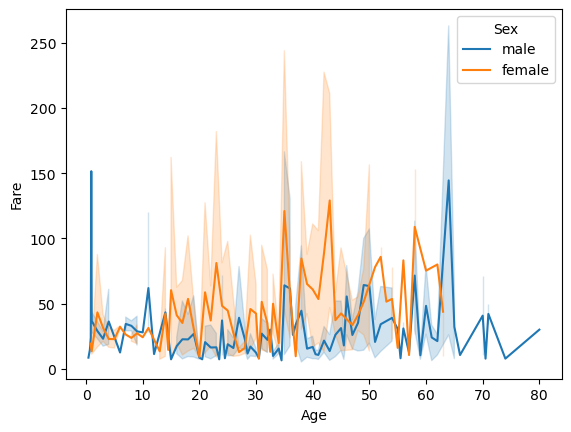

In [11]:
rdf.lineplot(x="Age", y="Fare", hue="Sex")

## Pieplot functions: `uni_pieplot` and `multi_pieplot`
________________________________________________________________________________

The pieplot functions draw a pie chart based on two different use cases.

The first function `uni_pieplot` is based on a use case where we want to create a pie chart for the values in one column 
by calculating each individual cell value in the column as a percentage of the sum of values in that column. This is particularly useful after running aggregated queries
as we weill see in the following example, but first, let's take a look at the arguments `uni_pieplot` takes:

- An obligatory `parts` string argument: the name of the column containing the values for each segment in the pie chart.
- A `Title` string argument.
- A `labels` argument: Either the name of the column containing labels values or a List[str] of the labels, in either case the order of the labels should follow the same order as the values in the `parts` column.
- A `fig_kwargs` dictionary argument which is where you can add any kwargs you wish to be forwarded onto matplotlib.pyplot.subplots() when created the figure that this piechart will be displayed on.
- A `key` boolean value where you can specify if you want a color map key placed to the side of your pie chart.
- And finally the `key_loc`, `key_title` and `key_bbox` options where you can specify the loc, title and bbox options for your color map key. These are forwarded on to matplotlib's legend function.

Now, let's take a look at an example of where we might use `uni_pieplot`. Here we will run an aggregated query to get the number of deceased per passenger class on the Titanic.

We first filter the dataset to those who did not survive the Titanic, we then select all necessary columns and group data by Pclass, then we get a count of values per each class and sort the output by Pclass.

We can then call our `uni_pieplot` function on this dataset specifying the "Survived" column as our `parts` argument, a title for our pie chart and the "Class" column to be used for labelling, to get our pie chart.

shape: (3, 2)
┌────────┬──────────┐
│ Pclass ┆ Survived │
│ ---    ┆ ---      │
│ i64    ┆ u32      │
╞════════╪══════════╡
│ 1      ┆ 80       │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┤
│ 2      ┆ 97       │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┤
│ 3      ┆ 372      │
└────────┴──────────┘


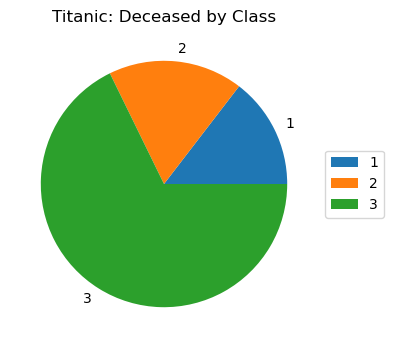

In [12]:
rdf_ex = (
    rdf.filter(pl.col("Survived") == 0)
    .select([pl.col("Survived"), pl.col("Pclass")])
    .groupby(pl.col("Pclass"))
    .agg(pl.col("Survived").count())
    .sort(pl.col("Pclass"))
)
print(rdf_ex.collect().fetch())
rdf_ex.uni_pieplot(
    parts="Survived", title="Titanic: Deceased by Class", labels="Pclass"
)

The `multi_pieplot` works similarly to uni_pieplot but has been created for a different kind of use case.

Here, we imagine we want to create a pie chart based where segments represent the sum of different columns in our dataset and the whole represents the sum of all these different columns. Before we look at an example of where `multi_pieplot` can be useful, let's have a look at the arguemnts `multi_pieplot` accepts. These remain the same as `uni_pieplot` except for the `parts` and `labels` arguments:

- An obligatory `parts` List[str] argument: the name of the columns that will be segments in our pie chart.
- A `Title` string argument.
- A `labels` argument: A List[str] of the labels which maps to the `parts` column in the same order.
- A `fig_kwargs` dictionary argument which is where you can add any kwargs you wish to be forwarded onto matplotlib.pyplot.subplots() when created the figure that this piechart will be displayed on.
- A `key` boolean value where you can specify if you want a color map key placed to the side of your pie chart.
- And finally the `key_loc`, `key_title` and `key_bbox` options where you can specify the loc, title and bbox options for your color map key. These are forwarded on to matplotlib's legend function.


The Titanic dataset in its current form is not very relevant for this `multi_pieplot` option, so I will create a new dataframe to illustrate the kind of use case where multi_pieplot
could be used.

In this example, I specify the `Apples sold`, `Bannanas sold` and `Pineapples sold` columns as my `parts` argument and send `Apples`, `Bannanas` and `Pineapples` as my labels.
The `multi_pieplot` will then take the sum of each of my `parts` columns and use these totals as the segments for my pie chart.

shape: (6, 4)
┌─────────┬─────────────┬───────────────┬─────────────────┐
│ weekday ┆ Apples sold ┆ Bannanas sold ┆ Pineapples sold │
│ ---     ┆ ---         ┆ ---           ┆ ---             │
│ str     ┆ i64         ┆ i64           ┆ i64             │
╞═════════╪═════════════╪═══════════════╪═════════════════╡
│ Mon     ┆ 10          ┆ 0             ┆ 1               │
├╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ Tues    ┆ 20          ┆ 33            ┆ 0               │
├╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ Wens    ┆ 5           ┆ 2             ┆ 3               │
├╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ Thurs   ┆ 2           ┆ 42            ┆ 4               │
├╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ Fri     ┆ 22          ┆ 0             ┆ 15              │
├╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ Sat     ┆ 12          ┆ 50            ┆ 6               │
└─────────┴─────────────┴─

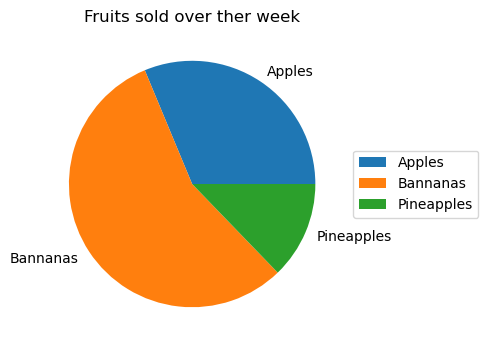

In [13]:
df = pl.DataFrame(
    {
        "weekday": ["Mon", "Tues", "Wens", "Thurs", "Fri", "Sat"],
        "Apples sold": [10, 20, 5, 2, 22, 12],
        "Bannanas sold": [0, 33, 2, 42, 0, 50],
        "Pineapples sold": [1, 0, 3, 4, 15, 6],
    }
)
rdf_pie = client.polars.send_df(df, policy=policy)
print(rdf_pie.collect().fetch())
rdf_pie.multi_pieplot(
    parts=["Apples sold", "Bannanas sold", "Pineapples sold"],
    title="Fruits sold over ther week",
    labels=["Apples", "Bannanas", "Pineapples"],
)

## Facet Grid Plots
_______________________________________________________________________________________________________________

The facet function lets you create a grid of plots that accepts a `col` and `row` argument. You can then call the `histplot`, `scatterplot` or `curveplot` functions to decide how you want to plot your data in the columns and rows of the grid. 

For example, if you have a Facet with a row value of "Pclass" of class and you call `my_facet.histplot(x="Age", bins=15)`, you will see three histplots: one showing the age of passengers in class 1, one for passengers in class 2 and the final one for class 3.

Before we continue any further, let's see the code for this example:

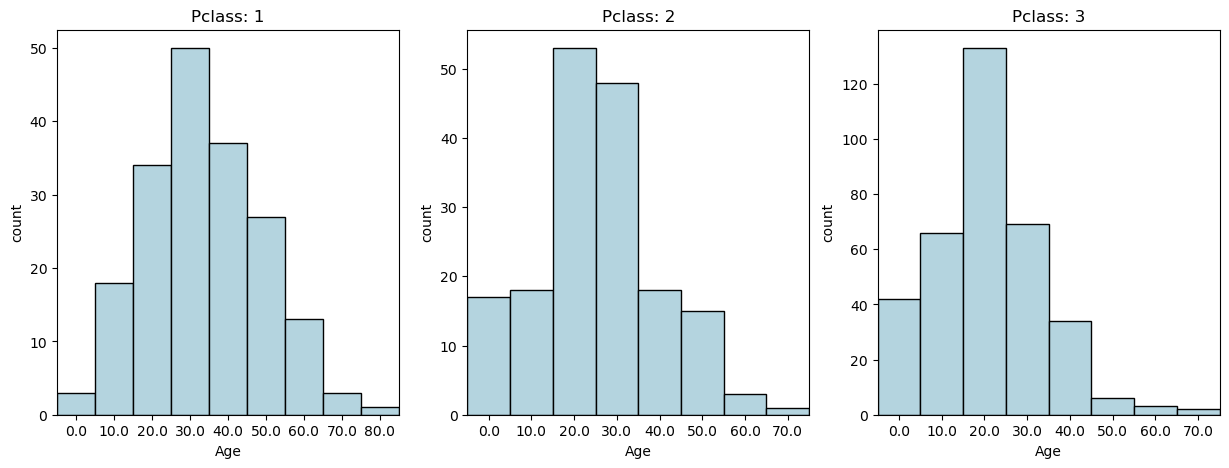

In [14]:
my_facet = rdf.facet(col="Pclass")
my_facet.histplot(x="Age")

Now that we have seen an example with a row, let's add a column! We will also specify the `figsize`, the size of the figure, we want for our grid.

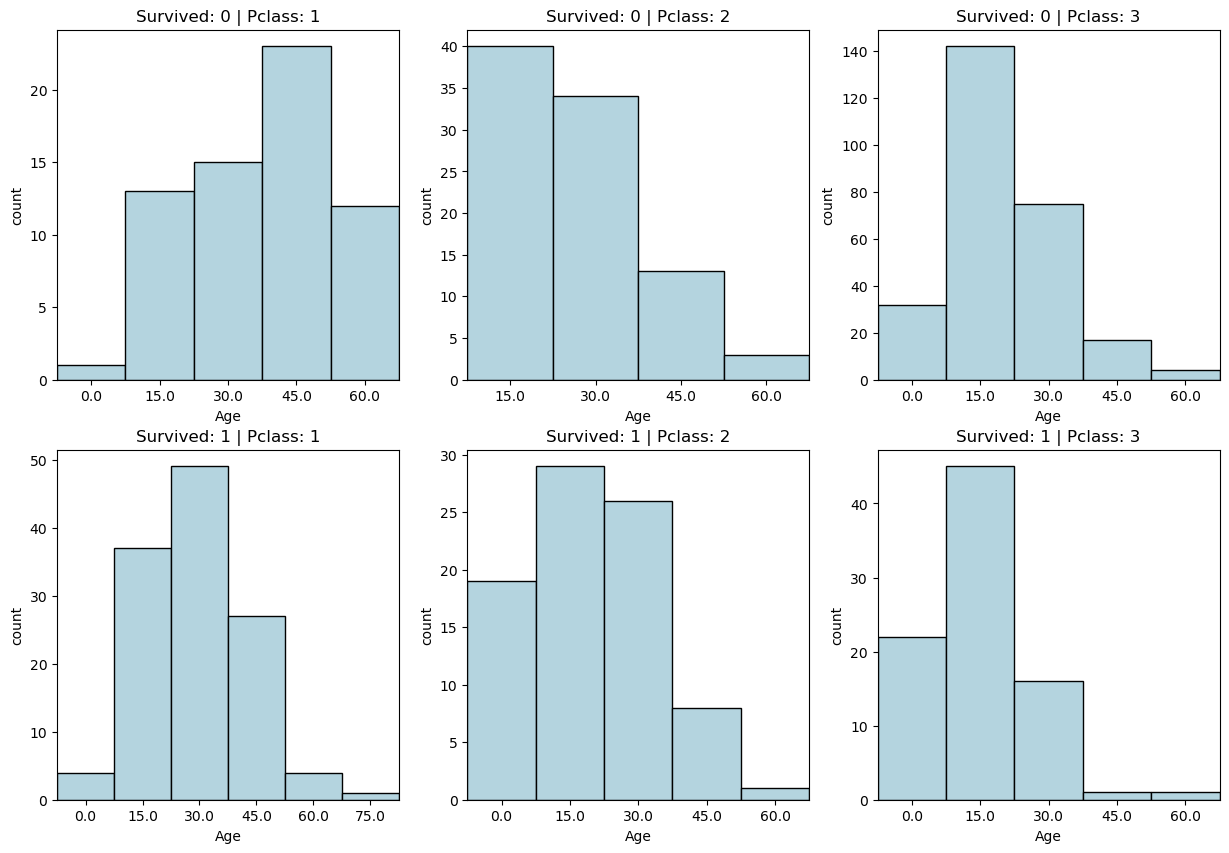

In [15]:
new_facet = rdf.facet(col="Pclass", row="Survived", figsize=(15, 10))
new_facet.histplot(x="Age", bins=15)

As you can see, the grid now splits results into all the possible combinations of the column and row values.

As previously mentioned, this feature works with all the visualization functions except for the pieplot functions. But please note that the `hue`, `size` `string` and `units` keywords are not longer possible for lineplot when using facet. Here's a facet grid with `scatterplot()`, for example:


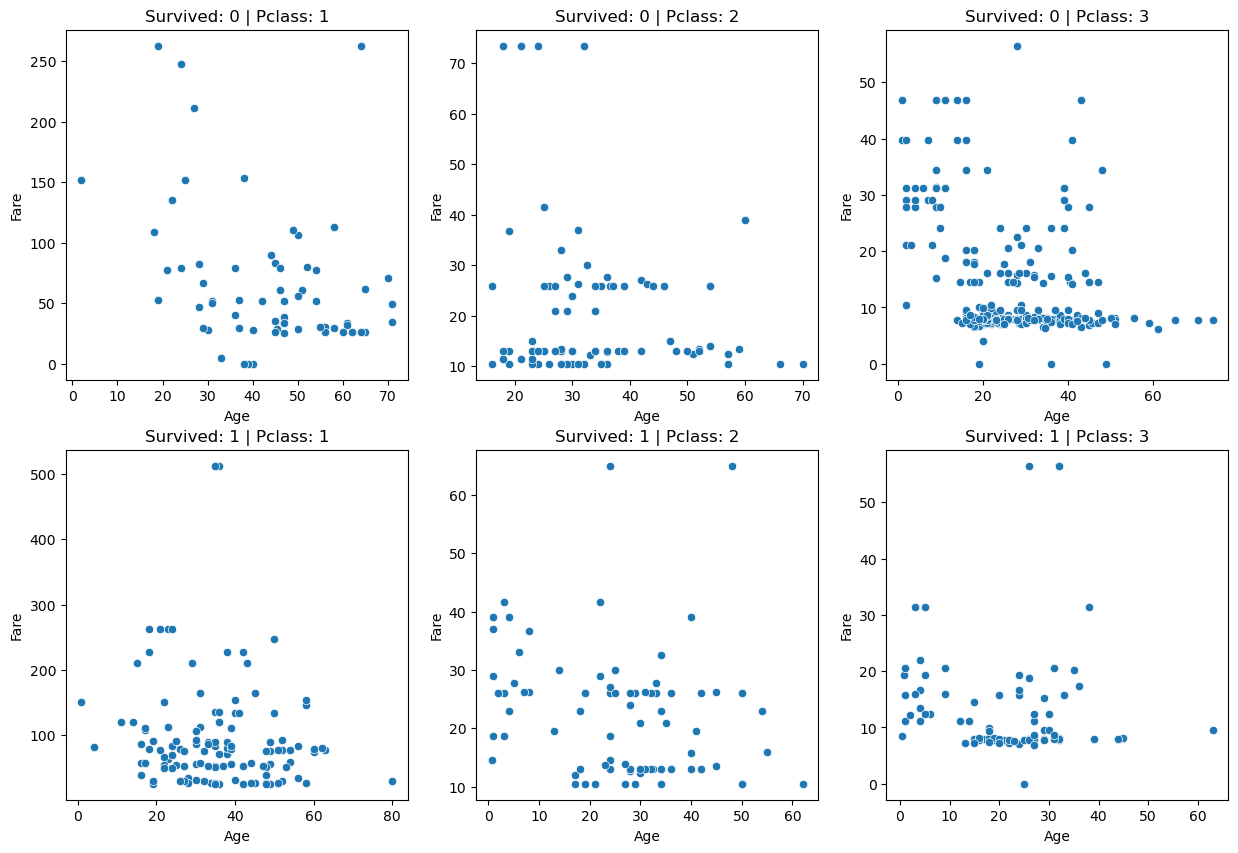

In [16]:
new_facet = rdf.facet(col="Pclass", row="Survived")
new_facet.scatterplot(x="Age", y="Fare")

That's it! So, finally, we will close the connection to the server.

In [17]:
connection.close()